In [28]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
import pandas as pd
train_dir = "cards-image-datasetclassification/train"
train_dataset_dir = pathlib.Path(train_dir)

val_dir = "cards-image-datasetclassification//valid"
val_dataset_dir = pathlib.Path(val_dir)

test_dir = "cards-image-datasetclassification/test"
test_dataset_dir = pathlib.Path(test_dir)
Image_Size = 112
Batch_Size = 32
Channels = 3
Epochs = 50
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset_dir, batch_size = Batch_Size, image_size = (Image_Size, Image_Size), shuffle = True)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dataset_dir, batch_size = Batch_Size, image_size = (Image_Size, Image_Size), shuffle = True)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_dir, batch_size = Batch_Size, image_size = (Image_Size, Image_Size), shuffle = True)
class_names = train_dataset.class_names
print(class_names)


Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'thre

In [29]:
train_ds = train_dataset
val_ds = val_dataset
test_ds = test_dataset

In [30]:
print(Image_Size)

112


In [31]:
import tensorflow as tf

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Image_Size, Image_Size),
    layers.Rescaling(1./255),
])

In [32]:
from functools import partial
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal")

In [33]:
model = tf.keras.Sequential([
    resize_and_rescale,
    DefaultConv2D(filters=16, kernel_size=7, input_shape=[Image_Size, Image_Size, 3]),
    
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=32, kernel_size=5),
    
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=64),
    
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=53, activation="softmax")
])

In [23]:
input_shape = (Batch_Size, Image_Size, Image_Size, Channels)

model.build(input_shape=input_shape)

In [34]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [37]:
history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[early_stopping])

Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 30s 122ms/step - accuracy: 0.0351 - loss: 4.0057 - val_accuracy: 0.1660 - val_loss: 2.9454
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - accuracy: 0.1713 - loss: 3.0237 - val_accuracy: 0.3887 - val_loss: 1.8969
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 31s 130ms/step - accuracy: 0.2864 - loss: 2.4076 - val_accuracy: 0.4604 - val_loss: 1.5650
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - accuracy: 0.3643 - loss: 2.1191 - val_accuracy: 0.6038 - val_loss: 1.2841
Epoch 5/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - accuracy: 0.4461 - loss: 1.8682 - val_accuracy: 0.6906 - val_loss: 1.0868
Epoch 6/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - accuracy: 0.4913 - loss: 1.7140 - val_accuracy: 0.7094 - val_loss: 1.0077
Epoch 7/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - accuracy: 0.5448 - loss: 1.5352 - val_accuracy: 0.7170 - val_loss: 0.8889
Epoch 8/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 27s 112ms/step - accuracy: 0.5816 - loss: 1

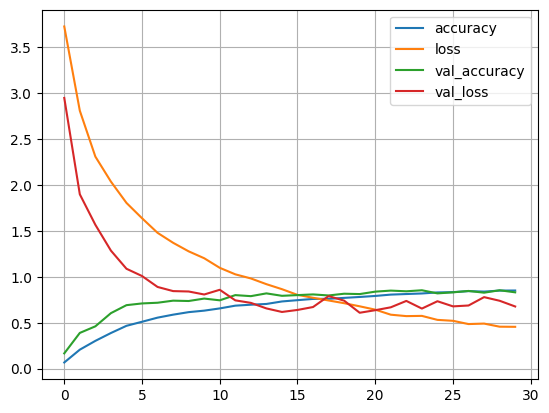

In [38]:
pd.DataFrame(history.history).plot(grid=True)
plt.show()

In [39]:
model.evaluate(test_ds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8063 - loss: 0.7929


[0.8948688507080078, 0.7886792421340942]

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = []
y_true = []
for images, labels in test_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


2024-08-09 21:09:01.285597: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


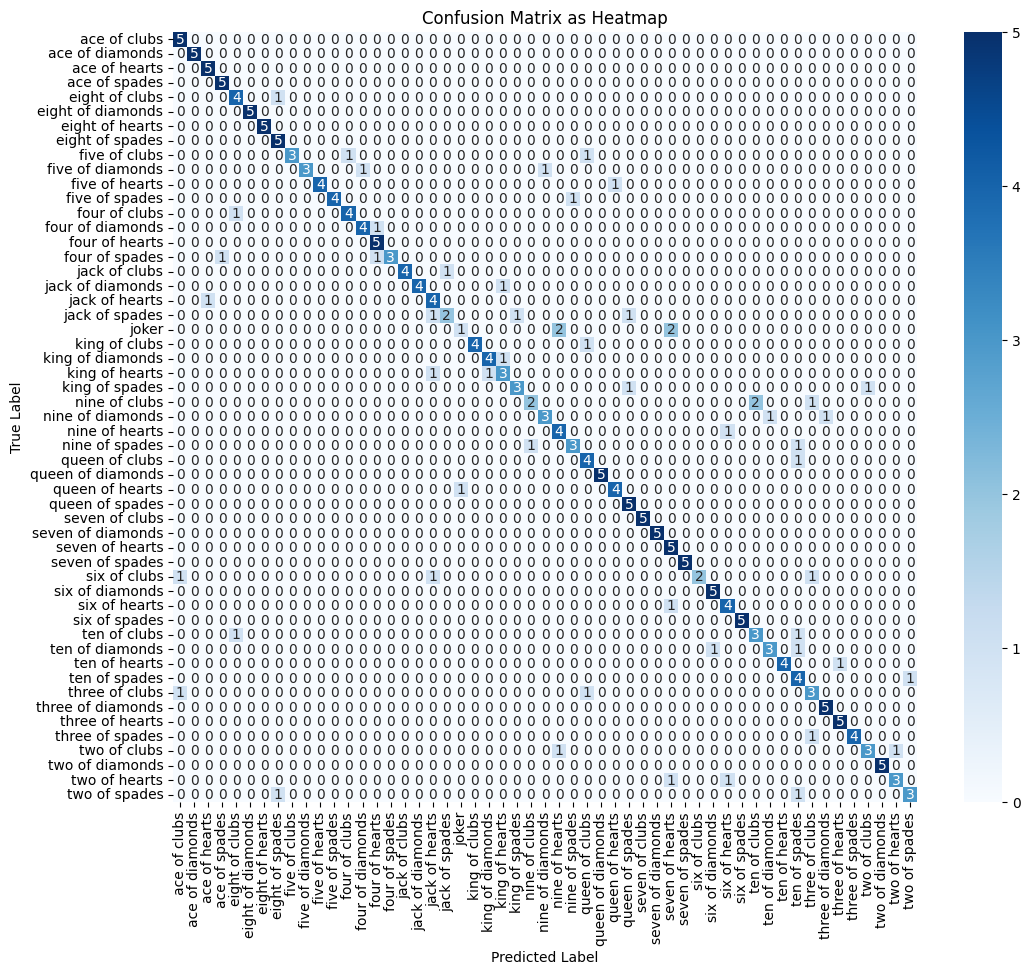

                   precision    recall  f1-score   support

     ace of clubs       0.71      1.00      0.83         5
  ace of diamonds       1.00      1.00      1.00         5
    ace of hearts       0.83      1.00      0.91         5
    ace of spades       0.83      1.00      0.91         5
   eight of clubs       0.67      0.80      0.73         5
eight of diamonds       1.00      1.00      1.00         5
  eight of hearts       1.00      1.00      1.00         5
  eight of spades       0.71      1.00      0.83         5
    five of clubs       1.00      0.60      0.75         5
 five of diamonds       1.00      0.60      0.75         5
   five of hearts       1.00      0.80      0.89         5
   five of spades       1.00      0.80      0.89         5
    four of clubs       0.80      0.80      0.80         5
 four of diamonds       0.80      0.80      0.80         5
   four of hearts       0.71      1.00      0.83         5
   four of spades       1.00      0.60      0.75       

In [46]:
import seaborn as sns
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix as Heatmap')
plt.show()

# Print the classification report
print(classification_report(y_true, y_pred, target_names=class_names))

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,366,901 (12.84 MB)

 Trainable params: 138,037 (539.21 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 38s 156ms/step - accuracy: 0.1246 - loss: 3.5026 - val_accuracy: 0.4453 - val_loss: 1.8112
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 38s 157ms/step - accuracy: 0.3758 - loss: 2.1188 - val_accuracy: 0.5547 - val_loss: 1.4531
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 37s 154ms/step - accuracy: 0.4787 - loss: 1.7715 - val_accuracy: 0.5925 - val_loss: 1.2816
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 37s 154ms/step - accuracy: 0.5247 - loss: 1.5701 - val_accuracy: 0.6642 - val_loss: 1.1800
Epoch 5/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 37s 154ms/step - accuracy: 0.5850 - loss: 1.4116 - val_accuracy: 0.6528 - val_loss: 1.0822
Epoch 6/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 37s 153ms/step - accuracy: 0.6194 - loss: 1.2719 - val_accuracy: 0.6717 - val_loss: 1.0653
Epoch 7/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 37s 154ms/step - accuracy: 0.6315 - loss: 1.2058 - val_accuracy: 0.6679 - val_loss: 1.0117
Epoch 8/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 37s 156ms/step - accuracy: 0.6448 - loss: 1

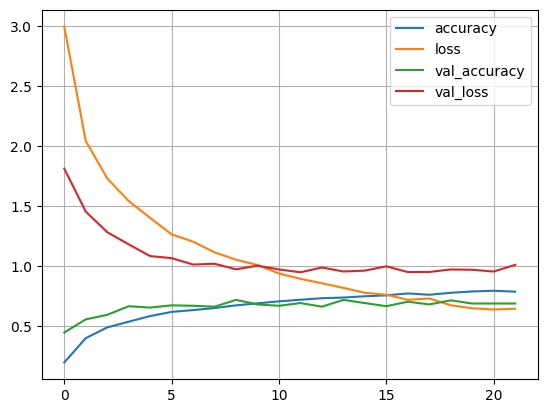

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.6473 - loss: 1.1380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


2024-08-09 20:34:12.458085: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


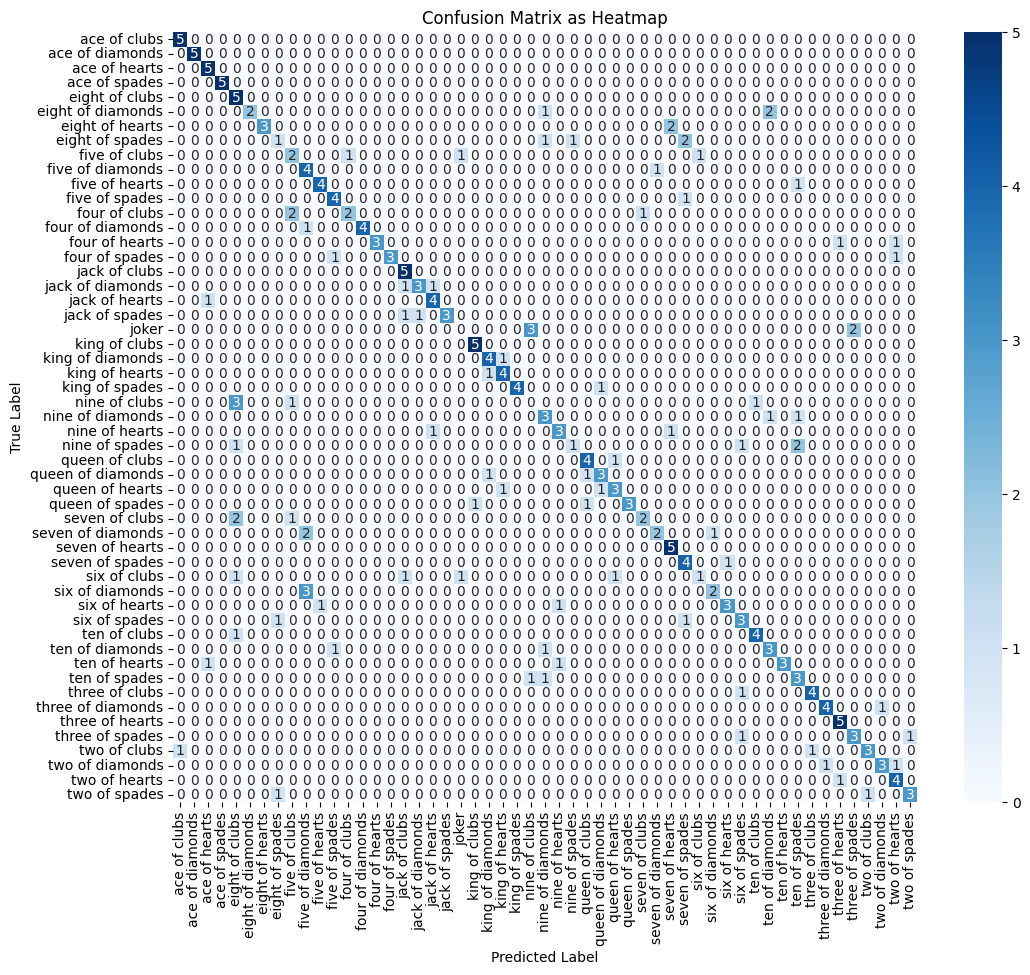

                   precision    recall  f1-score   support

     ace of clubs       0.83      1.00      0.91         5
  ace of diamonds       1.00      1.00      1.00         5
    ace of hearts       0.71      1.00      0.83         5
    ace of spades       1.00      1.00      1.00         5
   eight of clubs       0.38      1.00      0.56         5
eight of diamonds       1.00      0.40      0.57         5
  eight of hearts       1.00      0.60      0.75         5
  eight of spades       0.33      0.20      0.25         5
    five of clubs       0.33      0.40      0.36         5
 five of diamonds       0.40      0.80      0.53         5
   five of hearts       0.80      0.80      0.80         5
   five of spades       0.67      0.80      0.73         5
    four of clubs       0.67      0.40      0.50         5
 four of diamonds       1.00      0.80      0.89         5
   four of hearts       1.00      0.60      0.75         5
   four of spades       1.00      0.60      0.75       

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNet
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

Image_Size = 224
# Load datasets and preprocess
train_ds = train_dataset.map(lambda x, y: (resize_and_rescale(x), y))
val_ds = val_dataset.map(lambda x, y: (resize_and_rescale(x), y))
test_ds = test_dataset.map(lambda x, y: (resize_and_rescale(x), y))

# Load pre-trained MobileNet without the top fully connected layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(Image_Size, Image_Size, Channels))

# Freeze the base model layers to prevent them from being trained
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Add global average pooling layer
x = layers.Dropout(0.2)(x)  # Add dropout layer with 20% rate
x = tf.keras.layers.Dense(128, activation='relu')(x)  # Custom dense layer
x = layers.Dropout(0.2)(x)  # Add dropout layer with 20% rate
outputs = tf.keras.layers.Dense(53, activation='softmax')(x)  # Output layer

# Define the complete model
model = tf.keras.models.Model(inputs=base_model.input, outputs=outputs)

# Print model summary
model.summary()

# Compile the model with loss function, optimizer, and metrics
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Set early stopping criteria to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model and store the training history
history = model.fit(
    train_ds,
    epochs=Epochs,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

# Plot the training history
pd.DataFrame(history.history).plot(grid=True)
plt.show()

# Evaluate the model on the test dataset
model.evaluate(test_ds)

# Generate predictions on the test dataset
y_pred = []
y_true = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix as Heatmap')
plt.show()

# Print the classification report
print(classification_report(y_true, y_pred, target_names=class_names))
